In [1]:
import pandas as pd

data = pd.read_csv("../data/daten_aijan_filtered.csv")
data.head()

,beitragid,beitragdt,titel,mediumid,anzahlzeichen,Abstract,Inhalt
0,21319059,2017-10-25 00:00:00.000,Über das Ziel hinausgeschossen,1,3178,NaN,"André Müller, amü\nWerde digitaler, sonst steh..."
1,21312273,2017-10-21 00:00:00.000,Gewagte Schätzungen für die SKA 2.0,2,3474,NaN,Gewagte Schätzungen für die SKA 2.0 ...
2,20946237,2017-05-24 00:00:00.000,"Der Spion, den wir liebten",4,7259,NaN,Jean-Claude Galli\nIn den letzten Jahren ist e...
3,21826660,2018-06-29 00:00:00.000,Endlich Hilfe gegen Migräne!,4,1041,NaN,Neue Spritze bald auf dem Markt 1 Million Schw...
4,21820335,2018-06-26 00:00:00.000,Swiss Life übernimmt deutsche Immobilienfirma,1,1362,NaN,(sda) · Die Swiss Life baut ihre Stellung am d...


In [2]:
from datetime import datetime
data['datum'] = data['beitragdt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date())
del data['beitragdt']
del data['Abstract']
data.head()

,beitragid,titel,mediumid,anzahlzeichen,Inhalt,datum
0,21319059,Über das Ziel hinausgeschossen,1,3178,"André Müller, amü\nWerde digitaler, sonst steh...",2017-10-25
1,21312273,Gewagte Schätzungen für die SKA 2.0,2,3474,Gewagte Schätzungen für die SKA 2.0 ...,2017-10-21
2,20946237,"Der Spion, den wir liebten",4,7259,Jean-Claude Galli\nIn den letzten Jahren ist e...,2017-05-24
3,21826660,Endlich Hilfe gegen Migräne!,4,1041,Neue Spritze bald auf dem Markt 1 Million Schw...,2018-06-29
4,21820335,Swiss Life übernimmt deutsche Immobilienfirma,1,1362,(sda) · Die Swiss Life baut ihre Stellung am d...,2018-06-26


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_word_cluster(words):
    text = " ".join(schlagzeile for schlagzeile in words)
    wordcloud = WordCloud(collocations=False, background_color="white").generate(text)
    # Zeigt die Wortwolke mit Matplotlib an
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

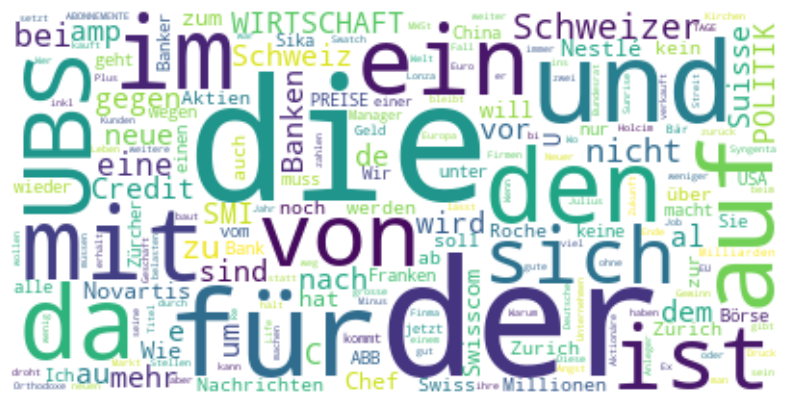

In [4]:
get_word_cluster(data['titel'])

In [12]:
import word_preprocessing as wpp

In [13]:
preprocesser = wpp.headline_preprocessing()

preprocesser.preprocess_headlines(data['titel'][0:10])

TypeError: __init__() missing 1 required positional argument: 'text'

In [38]:
from textblob_de import TextBlobDE as TextBlob
import nltk

def get_topic_sentiments(headlines):
    headline_blob = TextBlob(headlines)
    return headline_blob.sentiment.polarity

data111 = data['Inhalt'][0:100].apply(lambda x: get_topic_sentiments(x))

data111.head(100)

0     0.150000
1     0.175714
2     0.210423
3    -0.200000
4     0.231818
        ...   
95    0.097511
96    0.095588
97   -0.010000
98    0.096154
99    0.186486
Name: Inhalt, Length: 100, dtype: float64